## Exercises Linear Regression

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 0

In [177]:
#Simulate data with mean = 100 SD = 100 
np.random.seed(42)
phone_data_x = np.abs(np.random.normal(loc=100, scale=100, size=(400)))
phone_data_error = np.random.normal(loc=0, scale=50, size=(400))
phone_data_y = 25 + 2 * phone_data_x + phone_data_error

In [178]:
#Create a dataframe
phone_data = pd.DataFrame({"Called Minutes": phone_data_x, "Price": phone_data_y})
phone_data.head()

,Called Minutes,Price
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


In [180]:
def plot_data(data:pd.DataFrame, title:str, ground_truth=False) -> None:

    fig, ax = plt.subplots(dpi=100)
    sns.scatterplot(data = data, x = "Called Minutes", y = "Price")
    _ = ax.set(xlabel="Called Minutes per Month", ylabel="SEK per Month", title=title)

    if ground_truth:
        line_x = np.linspace(0,300,400)
        line_y = 25 + 2 * line_x
        _ = sns.lineplot(x=line_x, y=line_y, color="red")        

    plt.show()

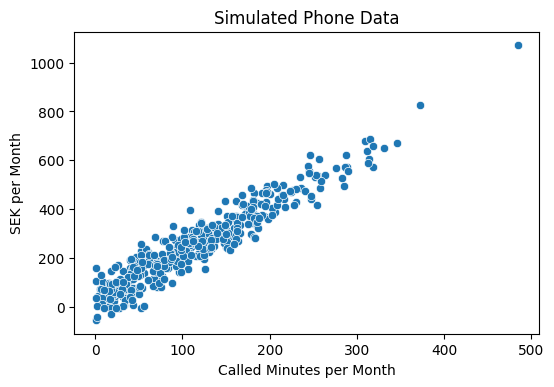

In [181]:
plot_data(phone_data, "Simulated Phone Data")

In [182]:
#Check for outliers in the predictor (x > 299)
phone_data[phone_data["Called Minutes"] > 300].count()

Called Minutes    11
Price             11
dtype: int64

In [183]:
#Check for outliers in the response variable (x < 0)
phone_data[phone_data["Price"] < 0].count()

Called Minutes    8
Price             8
dtype: int64

In [184]:
#Remove the outliers 
phone_data_outliers_rem = phone_data[(phone_data["Called Minutes"] <= 300) & (phone_data["Price"] >= 0)]
len(phone_data_outliers_rem)

381

In [185]:
phone_data_outliers_rem.head()

,Called Minutes,Price
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


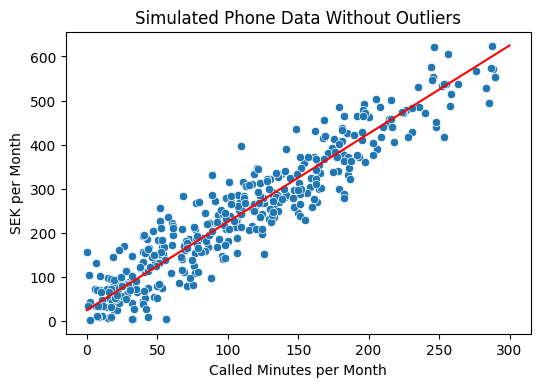

In [187]:
plot_data(phone_data_outliers_rem, ground_truth=True, title="Simulated Phone Data Without Outliers")

### Exercise 1

In [188]:
def train_test_split(X:pd.DataFrame, y:pd.DataFrame, train_fraction:float=.7, random_state:int=42, replace:bool=False) -> tuple:
    
    train_fraction = int(len(X) * train_fraction)

    X_train = X.sample(n=train_fraction, random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index) 
    
    y_train = y.sample(n=train_fraction, random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index) 
    
    return X_train, X_test, y_train, y_test

In [189]:
X_train, X_test, y_train, y_test = train_test_split(phone_data_outliers_rem["Called Minutes"], phone_data_outliers_rem["Price"])

In [190]:
#Checking so there are no matching indexes
print(X_test.index.isin(X_train.index).sum())
print(y_test.index.isin(y_train.index).sum())

0
0


In [136]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(len(X_train) + len(X_test))

266
115
266
115
381


### Exercise 2

In [239]:
def prediction_model(x_value):
    
    beta_1, beta_0 = np.polyfit(X_train, y_train, deg = 1) #degree 1 is simple linear regression
    predicted_value = beta_0 + beta_1 * x_value
    
    return predicted_value

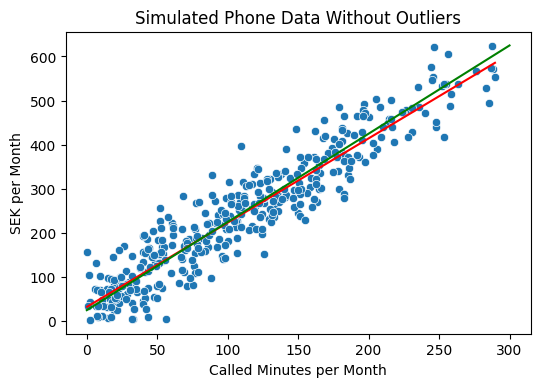

In [241]:
fig, ax = plt.subplots(dpi=100)

predicted_price_train_data = [prediction_model(data_point) for data_point in X_train]

line_x_ground_truth = np.linspace(0,300,400)
line_y_ground_truth = 25 + 2 * line_x_ground_truth

sns.scatterplot(data = phone_data_outliers_rem, x = "Called Minutes", y = "Price")
_ = ax.set(xlabel="Called Minutes per Month", ylabel="SEK per Month", title="Simulated Phone Data Without Outliers")
_ = sns.lineplot(x=X_train, y=predicted_price_train_data, color="red")
_ = sns.lineplot(x=line_x_ground_truth, y=line_y_ground_truth, color="green")

### Exercise 3

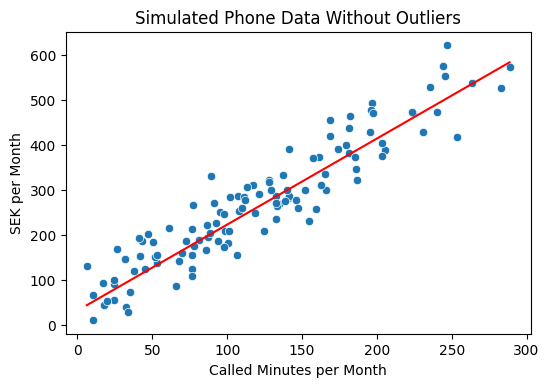

In [242]:
fig, ax = plt.subplots(dpi=100)

predicted_price_test_data = [prediction_model(data_point) for data_point in X_test]

sns.scatterplot(x=X_test, y=y_test)
_ = ax.set(xlabel="Called Minutes per Month", ylabel="SEK per Month", title="Simulated Phone Data Without Outliers")
_ = sns.lineplot(x=X_test, y=predicted_price_test_data, color="red")

In [246]:
predictions = pd.DataFrame({"Real value":y_test, "Predicted value":predicted_price_test_data})

In [248]:
MAE = 1 / len(predicted_price_test_data) * np.sum(np.abs(predictions["Real value"] - predictions["Predicted value"]))
MSE = 1 / len(predicted_price_test_data) * np.sum((predictions["Real value"] - predictions["Predicted value"]) ** 2)
RMSE = np.sqrt(MSE)

print(MAE, MSE, RMSE)   

40.12002651149213 2401.5771288677292 49.00588871623215
